In [1]:
# Lineer Regresyon

# y(i) =  B0 + B1x(i) + E
# y = Response Variable
# B0 B1 = Coefficients
# x = Covariate
# E = Error Term

# Koşullar (Basit Doğrusal Regresyon)
# x ler ve y lerin lineer bir ilişkisi olduğunu tespit edyoruz. 
# Datanın normalden geldiğini varsayıyoruz.
# Error term leri standart normal den geldiğini ve ortalamasının 0 olduğunu varsayıyoruz.
# Error ler rastgele dağılır diyoruz.
# Constant bir varyansları(homoscedasticity) vardır diyoruz.

# Çoklu doğrusal regresyonda(1'den fazla x varsa) bunlara ek olarak multicollinearity'ye bakıyoruz, yani
# modele giren x'ler birbirlerinin fonksiyonu olmaması lazım.birbiriyle ilişkili olmamalı 

# Kategorik değişkeni tahmin etmeye çalışırsak, biz fonksiyonumuzda ,e üzerini aldığımz için doğrusal olmaz 
#bu da Logistik Regresyon olur.

# Tahmin Yöntemleri
# LSE (Least Squares Estimation Method)
# MLE (Maximum Likelihood Estimation Method)

# lojistik regresyonda ;Bağımsız değişkenlerimiz arasında kategorik bir değer varsa o zaman dummy variable kullanırız.

# LINEER REGRESSION

In [21]:
#kategorik veriler lineerde kullanılmaz
#hedef degiskenimizlineerde kategorik olamaz
import numpy as np
import pandas as pd

adv = pd.read_csv("C:\\Users\\ekorkmaz\\Desktop\\EnkTelefonYedek\\kodluyoruz\\3.hafta\\hmelq.csv") 
adv=adv.dropna()
adv=adv.drop(["reason","job","bad"],axis=1)#kolon siler
adv.head()

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
153,18200,94727.0,136877.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,21700,79240.0,96784.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,34100,241931.0,36486.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,8400,62989.0,76718.0,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,17400,25859.0,43684.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108


In [22]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 153 to 3549
Data columns (total 10 columns):
loan       2018 non-null int64
mortdue    2018 non-null float64
value      2018 non-null float64
yoj        2018 non-null float64
derog      2018 non-null float64
delinq     2018 non-null float64
clage      2018 non-null float64
ninq       2018 non-null float64
clno       2018 non-null float64
debtinc    2018 non-null float64
dtypes: float64(9), int64(1)
memory usage: 173.4 KB


In [23]:
adv.describe().T

,count,mean,std,min,25%,50%,75%,max
loan,2018.0,19010.257681,10768.607345,1700.00,12000.0000,16900.000,23600.0000,89900.000
mortdue,2018.0,76337.035183,44476.368189,5076.00,49577.2500,67595.000,92922.7500,399412.000
value,2018.0,106899.244797,54026.707096,23031.00,71287.2500,94514.000,121220.7500,512650.000
yoj,2018.0,9.003964,7.573012,0.00,3.0000,7.000,13.0000,41.000
derog,2018.0,0.150149,0.580421,0.00,0.0000,0.000,0.0000,10.000
delinq,2018.0,0.264123,0.789816,0.00,0.0000,0.000,0.0000,10.000
clage,2018.0,180.645020,84.420116,0.49,118.2050,176.670,229.6925,1168.230
ninq,2018.0,1.037661,1.578414,0.00,0.0000,0.000,2.0000,13.000
clno,2018.0,22.265114,9.457238,0.00,16.0000,21.000,27.0000,64.000
debtinc,2018.0,34.105829,8.438411,4.03,29.2955,34.949,38.9520,144.189


In [24]:
adv.isnull().values.any()

False

In [25]:
adv.corr()

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
loan,1.000000,0.282651,0.379027,0.098801,-0.024812,-0.045501,0.064738,0.054942,0.097961,0.157596
mortdue,0.282651,1.000000,0.867368,-0.092880,-0.049734,-0.041545,0.132383,0.020796,0.343742,0.194930
value,0.379027,0.867368,1.000000,-0.003837,-0.055510,-0.066153,0.194847,-0.021380,0.234563,0.138076
yoj,0.098801,-0.092880,-0.003837,1.000000,-0.054276,0.043922,0.222843,-0.049494,0.001370,-0.047849
derog,-0.024812,-0.049734,-0.055510,-0.054276,1.000000,0.167600,-0.059206,0.153468,0.059943,0.063426
delinq,-0.045501,-0.041545,-0.066153,0.043922,0.167600,1.000000,0.039487,0.013890,0.099542,0.066169
clage,0.064738,0.132383,0.194847,0.222843,-0.059206,0.039487,1.000000,-0.083368,0.184581,-0.046713
ninq,0.054942,0.020796,-0.021380,-0.049494,0.153468,0.013890,-0.083368,1.000000,0.081600,0.152820
clno,0.097961,0.343742,0.234563,0.001370,0.059943,0.099542,0.184581,0.081600,1.000000,0.155147
debtinc,0.157596,0.194930,0.138076,-0.047849,0.063426,0.066169,-0.046713,0.152820,0.155147,1.000000


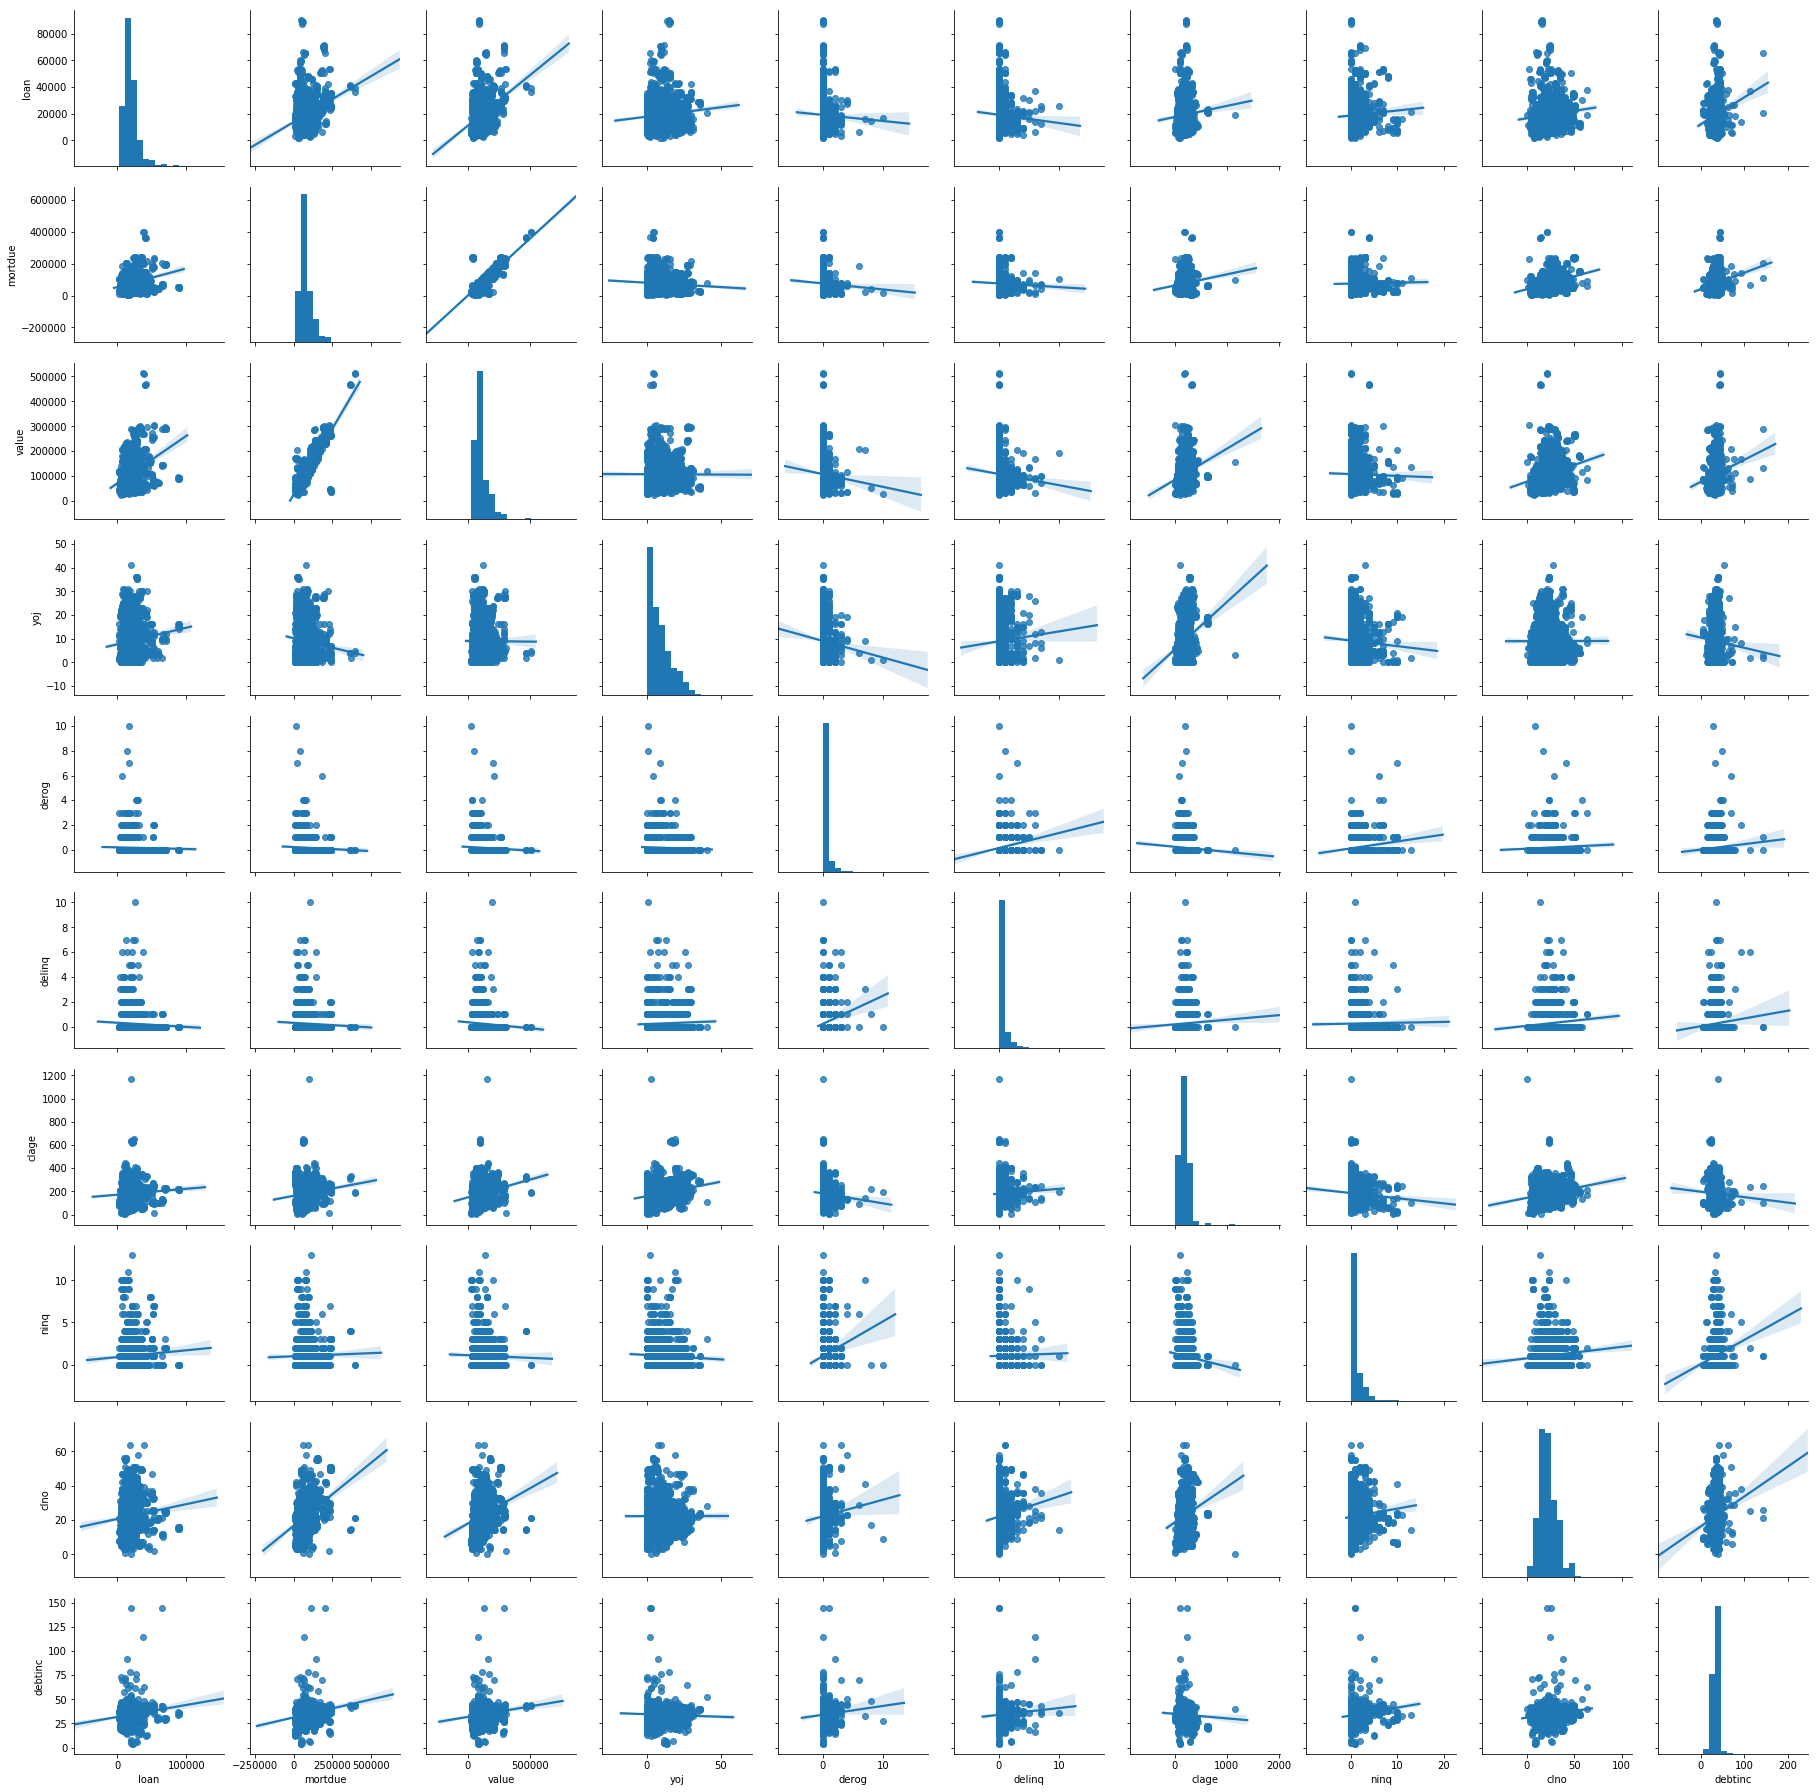

In [26]:
# Evet ben bir lineer regresyon modeli kurmak istiyorum ama lineer mi bu ilişkiler(xler ile y ilişkisi) bir kontrol edeyim 
#diyorum.( asagıdaki kod ile )
#sisli regresyon olanları modelde kullanmam cünkü onlar bozuk veri barındırır
import seaborn as sns
sns.pairplot(adv, kind = 'reg')
#regresyonunu yapacagım model parametreleri;
#mortdue icin loan,value,yoj,ninq,clno kullanilabilir
#Diger parametreler icin düzgün bir iliski bulamadım x leri araasında o yüzden yoju tahmin etmeyecegim


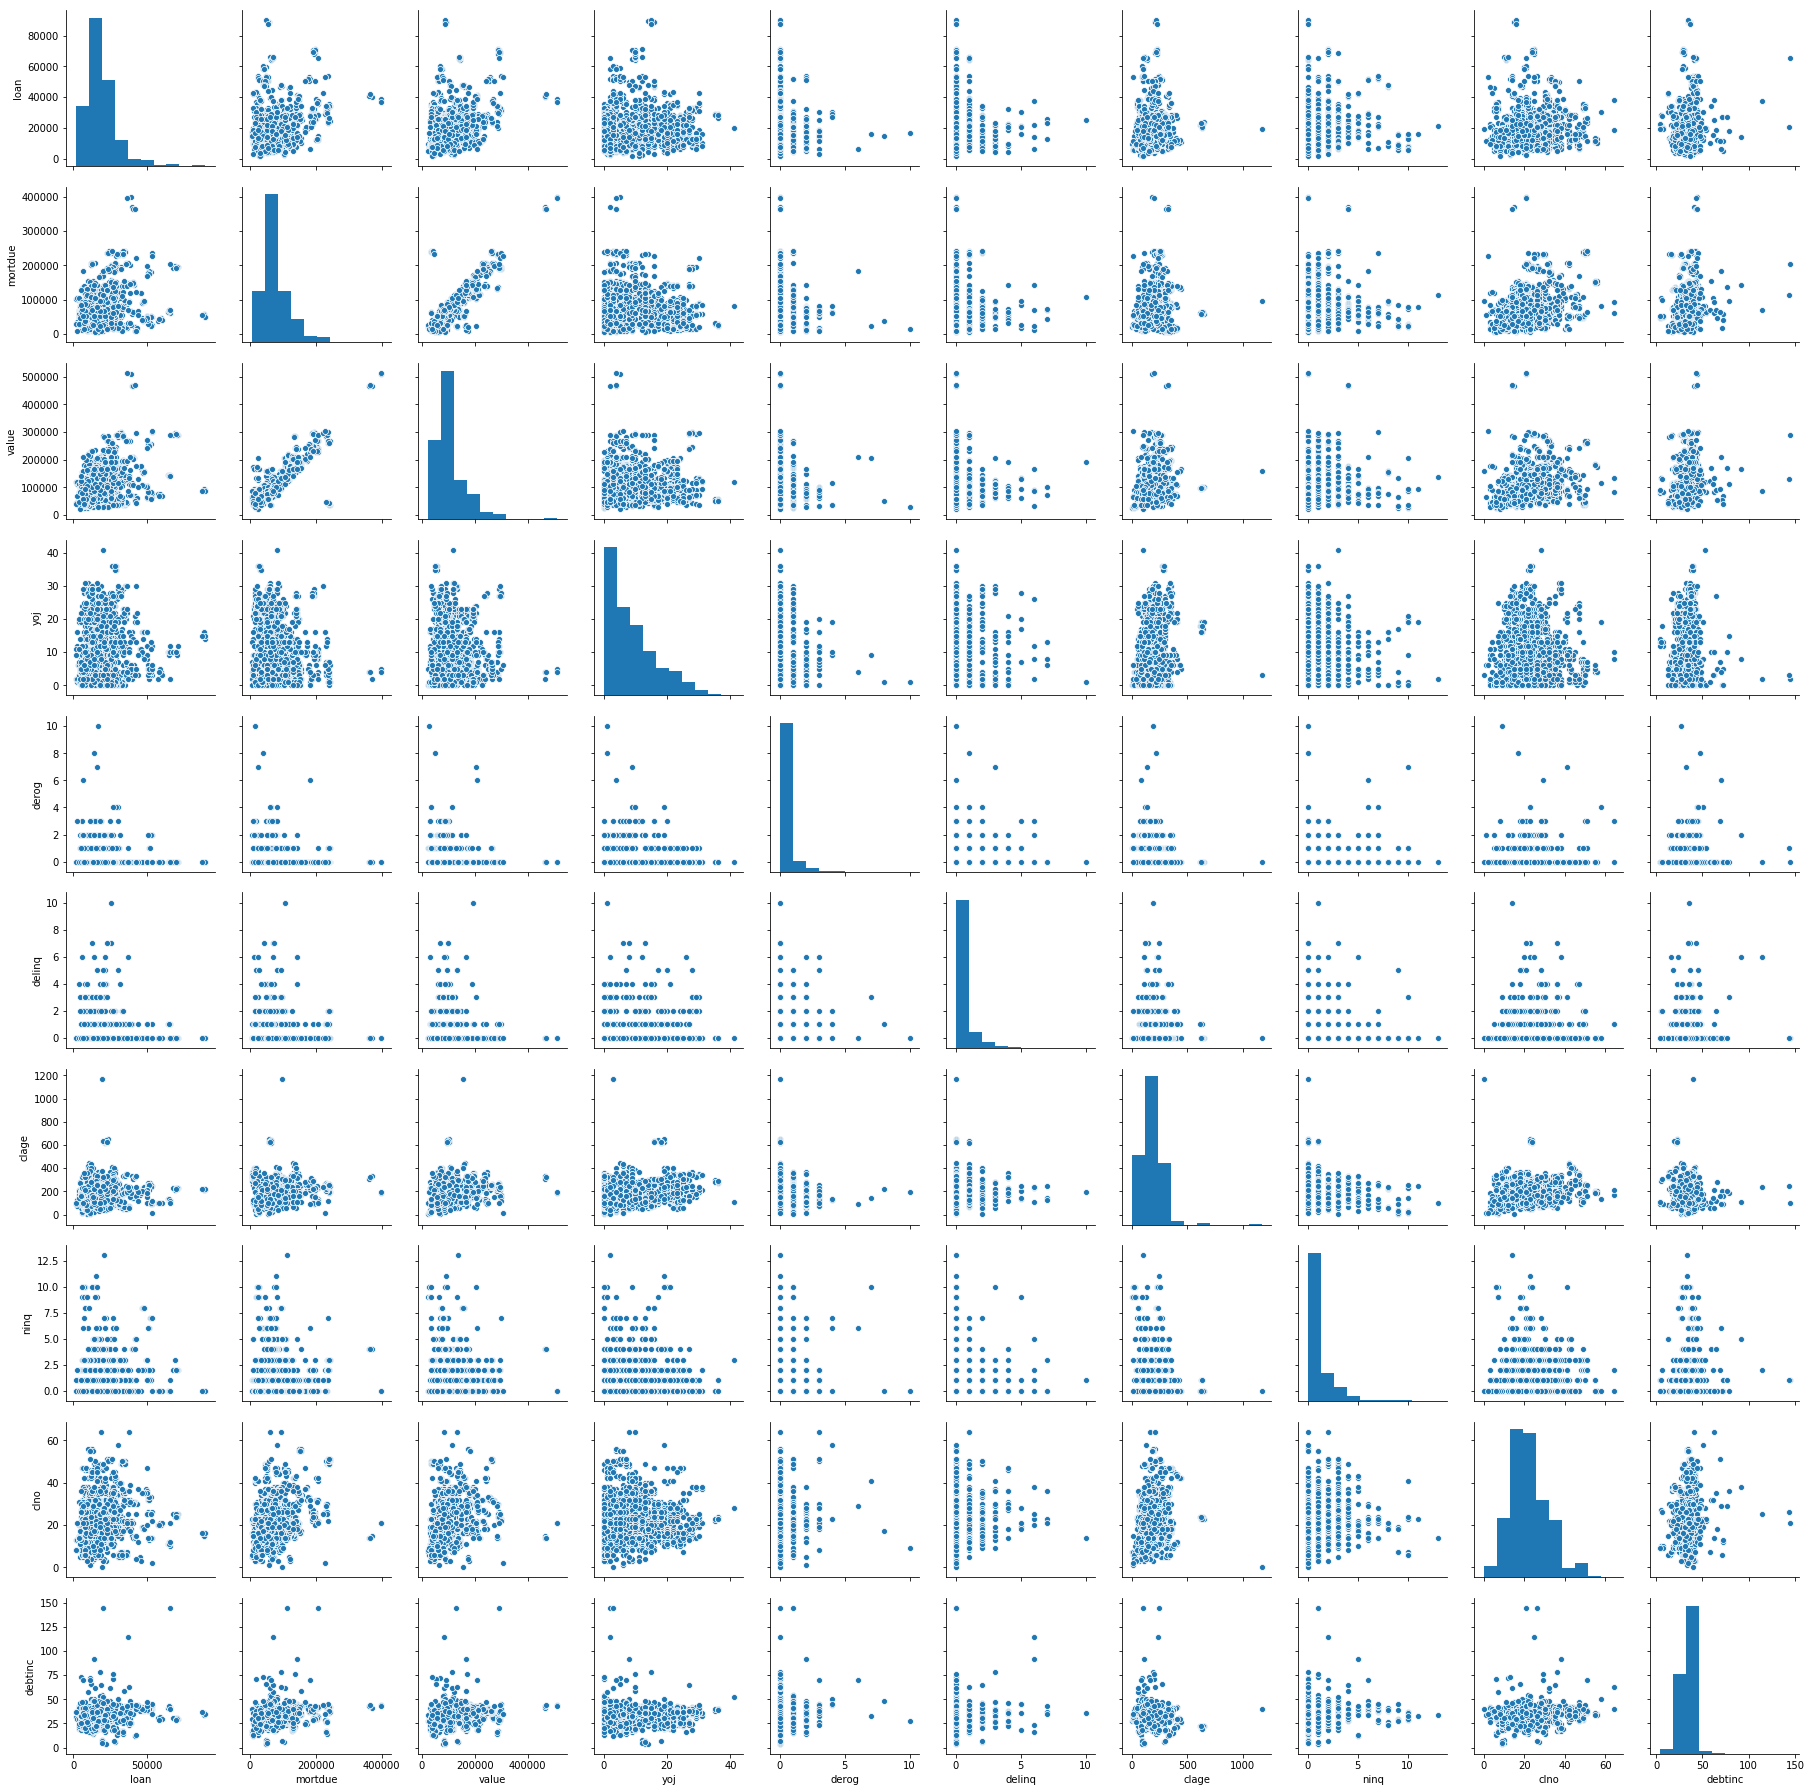

In [27]:
sns.pairplot(adv, kind = 'scatter')
#Aynı zamanda regresyon modeli oluşturacağımız için olmaması gereken multicollinearity ye de bakabiliyoruz.
#multicollerity=xlerin birbirine bagımlılıgı 
#asagidaki grafikte de gozuktugu gibi mortdue ve value arasında lineerlik oldugu icin 2sinden birisini 
#tanımlarken digerini kullanbiliriz deriz yani mortdue yu tanımlarken valueyu kullanabiliriz 

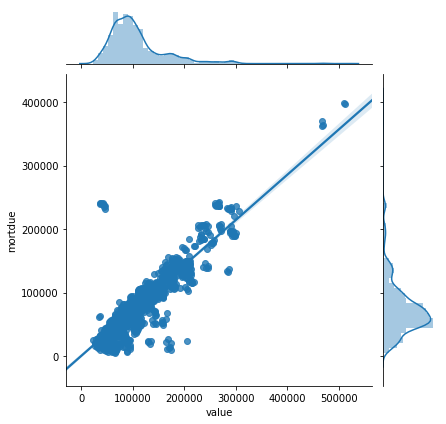

In [47]:
#tekli regression yapcagım icin value degerinden mortdueyu hesaplamaya calisiyorum
#cünkü ykarda mortdue ile value arasında lineer ilişki gözlemledim
sns.jointplot(x = "value", y = "mortdue", data = adv, kind = 'reg')
#x=girdi feature'üm ,y =hedef degiskenim
#hedef degiskenim ile x imin ilişkisini verir her birinin dagılımını cizer

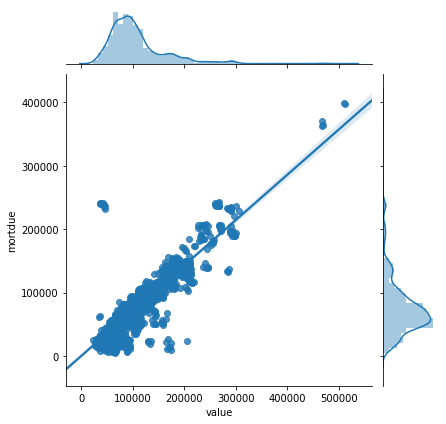

In [48]:
sns.jointplot(x = "value", y = "mortdue", data = adv, kind = 'reg')
#x=girdi feature'üm ,y =hedef degiskenim
#hedef degiskenim ile x imin ilişkisini verir her birinin dagılımını cizer

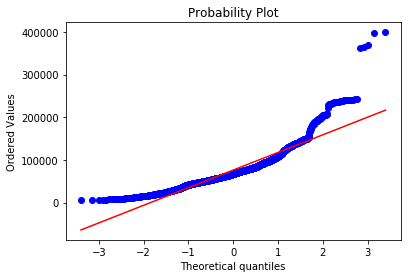

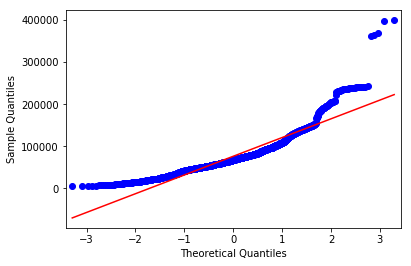

In [49]:
import scipy.stats as stats
import pylab

# TV değişkenim normalden mi geliyor diye bakıyoruz.
stats.probplot(adv["mortdue"], dist = "norm", plot = pylab)
pylab.show()

import statsmodels.api as sm
sm.qqplot(adv["mortdue"], line = "s")
pylab.show()

In [50]:
X = adv[["value"]] # Köşeli parantezle yazınca adını da yazıyor.(TV'yi)
X[0:5]

,value
153,136877.0
154,96784.0
155,36486.0
156,76718.0
157,43684.0


In [52]:
X = sm.add_constant(X)#b0 parametresinin degerlerini bulmak icin biz kendimiz yeni kolon ekleriz b0 
X[0:5]

,const,value
153,1.0,136877.0
154,1.0,96784.0
155,1.0,36486.0
156,1.0,76718.0
157,1.0,43684.0


In [53]:
y = adv["value"] # Predict etmek istediğim değerler
y[0:5] 

153    136877.0
154     96784.0
155     36486.0
156     76718.0
157     43684.0
Name: value, dtype: float64

In [54]:
# Basit Lineer Regresyon oluşturmanın ilk yolu
lm = sm.OLS(y,X)
model = lm.fit()
model.summary()

# R^2 0 ve 1 arasında değişiyor, 1'e yaklaştıkça model iyileşiyor.

# Prob(F-statistic) çıktısının hipotezleri:
# H0 : B0 = B1
# H1 : B0 != B1
# H1 hipotezinde burada diyorum ki B0 ya da B1'in en az birisi modelime etki eder. 

# P>|t| çıktısının hipotezleri:
# H0 : B0 = 0              H0 : B1 = 0
# H1 : B0 != 0             H1 : B1 != 0
# Burada da hangisi etki edere bakıyoruz.

# Çıktıda const dediğimiz B0. Yani benim şöyle bir fonksiyonum var:
# loan = 17745.28 + yoj*140.49

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.116e+34
Date:                Sat, 21 Sep 2019   Prob (F-statistic):               0.00
Time:                        20:49:54   Log-Likelihood:                 47218.
No. Observations:                2018   AIC:                        -9.443e+04
Df Residuals:                    2016   BIC:                        -9.442e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.819e-12   8.23e-13      2.209      0.027    2.04e-13    3.43e-12
value          1.0000   6.87e-18   1.45e+17      0.000       1.000       1.000
==============================================================================
Omnibus:                      483.864   Durbin-Watson:                   0.855
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1287.596
Skew:                           1.261   Prob(JB):                    2.52e-280
Kurtosis:                       5.992   Cond. No.                     2.66e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.66e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
# Başka bir yolu
import statsmodels.formula.api as smf
lm = smf.ols("mortdue ~ value", adv)
model = lm.fit()
model.summary()
model.params # Benim B0 B1 im nedir onu söylüyor.
model.summary().tables[1] # 
model.conf_int()
print("f_pvalue: ", "%.4f" % model.f_pvalue) # Prob (F-statistic)
print("fvalue: ", "%.2f" % model.fvalue)
print("tvalue: ", "%.2f" % model.tvalues[0:1])
model.rsquared_adj # Adjustant R squared R squared den daha güvenilir.
model.fittedvalues[0:5] 
y[0:5]
print("mortdue = " + str("%.2f" % model.params[0]) + " + value" + "*" + str("%.2f" % model.params[1]))


f_pvalue:  0.0000
fvalue:  6123.78
tvalue:  0.01
mortdue = 6.39 + value*0.71


Text(0.5, 0, 'Value degeri')

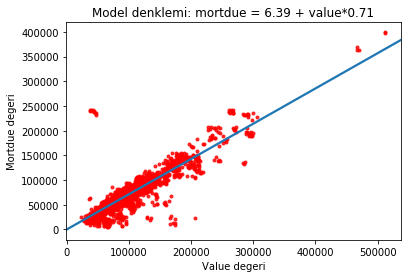

In [56]:
g = sns.regplot(adv["value"], adv["mortdue"], ci = None, scatter_kws = {'color':'r', 's':9})
g.set_title("Model denklemi: mortdue = 6.39 + value*0.71")
g.set_ylabel("Mortdue degeri")
g.set_xlabel("Value degeri")

In [57]:
from sklearn.linear_model import LinearRegression
X = adv[['value']]
y = adv['mortdue']
reg = LinearRegression()
model = reg.fit(X,y)
model.intercept_
model.coef_
model.score(X,y)
model.predict(X)[0:10] # Fitted değerlerimiz(y head olanlar)
model.predict([[30]]) # Sadece 30 değeri için tahminleme

array([27.81482438])

In [58]:
from sklearn.metrics import mean_squared_error, r2_score
lm = smf.ols("mortdue ~ value", adv)
model = lm.fit()
model.summary()
mse = mean_squared_error(y, model.fittedvalues)
mse
# R^2 hesaplarken mse kullanırız.

489689987.6286689

In [59]:
import numpy as np
rmse = np.sqrt(mse)
rmse
reg.predict(X)[0:10]
y[0:10]
k_t = pd.DataFrame({"gercek_y": y[0:10], "tahmin_y": reg.predict(X)[0:10]})
k_t

# Modelimin doğruluğunu kontrol ettirmek için yaptığım hesaplamalar
# MSE tekrardan hesaplamak yaptığım şey altta 
# Residual dediklerim gerçek y - bulduğum y
k_t["hata"] = k_t["gercek_y"] - k_t["tahmin_y"]
k_t
k_t["hata_kare"] = k_t["hata"]**2
k_t

np.sum(k_t["hata_kare"])
np.mean(k_t["hata_kare"])
np.sqrt(np.mean(k_t["hata_kare"]))

68587.17864234438

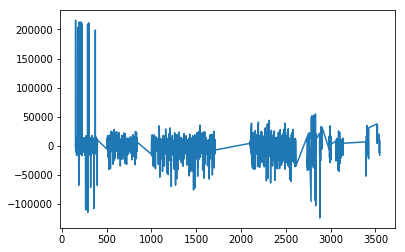

In [60]:
import matplotlib.pyplot as plt
model.resid[0:10]
plt.plot(model.resid)
# Stationary bir error dağılımı(constant)

# Çoklu Regresyon

In [61]:


from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X = adv.drop("mortdue", axis = 1)
y = adv["mortdue"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape
y_train.shape
X_test.shape
y_test.shape
training = adv.copy()
training.shape
df = adv.copy()


In [62]:
lm = sm.OLS(y_train, X_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                mortdue   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     3073.
Date:                Sat, 21 Sep 2019   Prob (F-statistic):               0.00
Time:                        20:52:41   Log-Likelihood:                -18321.
No. Observations:                1614   AIC:                         3.666e+04
Df Residuals:                    1605   BIC:                         3.671e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
loan          -0.2416      0.051     -4.713      0.000      -0.342      -0.141
value          0.6923      0.011     64.977      0.000       0.671       0.713
yoj         -517.1083     68.844     -7.511      0.000    -652.141    -382.075
derog      -3184.4315    985.305     -3.232      0.001   -5117.052   -1251.811
delinq       788.5564    657.994      1.198      0.231    -502.061    2079.174
clage        -27.9230      6.118     -4.564      0.000     -39.924     -15.922
ninq         415.0298    318.519      1.303      0.193    -209.728    1039.787
clno         626.3318     55.357     11.314      0.000     517.753     734.911
debtinc       85.1815     44.585      1.911      0.056      -2.270     172.633
==============================================================================
Omnibus:                     1268.589   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            91233.780
Skew:                           3.093   Prob(JB):                         0.00
Kurtosis:                      39.309   Cond. No.                     2.36e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.36e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

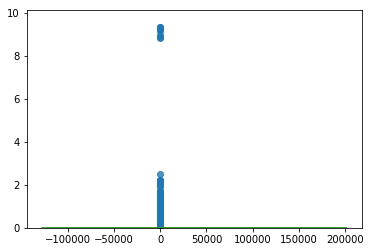

In [68]:
# Detect outliers
# Düzgün bir model kurdum mu test etmeye başlıyorum. Cooks distance kullanıyorum.(Modelle hesaplanıyor)
# Residualların(orijinal değer - bulduğum değer yani errorlerim)  outlier'ı var mı yok mu diye bakıyorum
# Koşulum olan "Residualler de normalden gelir" 'i araştırıyorum

influence = model.get_influence()
influence
resid_student = influence.resid_studentized_external
(cooks, p) = influence.cooks_distance
(dffits, p) = influence.dffits
leverage = influence.hat_matrix_diag
leverage # (Benim sahip olduğum residuallar distancelarının hesaplanmış hali)

# model.resid_pearson olması gereken(normalden geldiğini varsayan) error dağılımı hesaplanmış hali
import seaborn as sns
sns.regplot(leverage, model.resid_pearson, fit_reg = True)
advres = pd.concat([adv, pd.Series(model.resid, name = 'resid'),
                    pd.Series(model.predict(), name = 'predict')], axis = 1)
sns.kdeplot(np.array(advres.resid), bw = 10) # Residuallarım normalden gelse nasıl dağılır diye çıkaran plot 
sns.distplot(np.array(advres.resid), hist = False)


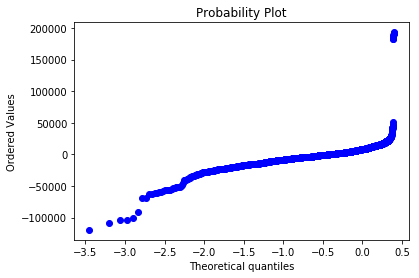

In [69]:
# Koşulum olan "Residualler de normalden gelir" 'i araştırıyorum
import pylab
import scipy.stats as stats
stats.probplot(advres.resid, dist = "norm", plot = pylab)
pylab.show()

In [70]:
from scipy.stats import shapiro

stat, p = shapiro(advres.resid.dropna())
print(stat, p)

0.706670880317688 0.0


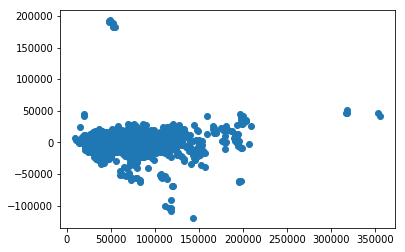

In [71]:
resid = model.resid
plt.scatter(model.predict(), resid)

In [72]:
# 
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
lm = smf.ols("mortdue ~ loan+ value + yoj + derog +clage + clno", df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                mortdue   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     1224.
Date:                Sat, 21 Sep 2019   Prob (F-statistic):               0.00
Time:                        21:04:09   Log-Likelihood:                -22910.
No. Observations:                2018   AIC:                         4.583e+04
Df Residuals:                    2011   BIC:                         4.587e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3225.1526   1651.041     -1.953      0.051   -6463.081      12.776
loan          -0.1946      0.046     -4.190      0.000      -0.286      -0.104
value          0.7044      0.010     73.569      0.000       0.686       0.723
yoj         -448.2051     62.860     -7.130      0.000    -571.482    -324.929
derog      -1501.8327    797.921     -1.882      0.060   -3066.671      63.006
clage        -23.4160      5.779     -4.052      0.000     -34.750     -12.082
clno         739.0018     50.761     14.559      0.000     639.453     838.551
==============================================================================
Omnibus:                     1520.441   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           109396.980
Skew:                           2.914   Prob(JB):                         0.00
Kurtosis:                      38.596   Cond. No.                     4.36e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.36e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
print("Model denklemi: mortdue = -3225.1526*B0 + (-0.1946)* loan + 0.7044*Value + (-448.2051)*Yoj + (-1501.8327)* Derog + (-23.4160)*Clage + 739.0018*Clno ")

Model denklemi: mortdue = -3225.1526*B0 + (-0.1946)* loan + 0.7044*Value + (-448.2051)*Yoj + (-1501.8327)* Derog + (-23.4160)*Clage + 739.0018*Clno 
